In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HousePrices.csv")

In [3]:
df.head(2)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
df.shape

(2073, 81)

In [5]:
# Check for missing values
df.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [6]:
missingdata = df.isnull()

In [7]:
for column in missingdata.columns.values.tolist():
    print(column)
    print(missingdata[column].value_counts())
    print("")

Id
False    2073
Name: Id, dtype: int64

Dwell_Type
False    2073
Name: Dwell_Type, dtype: int64

Zone_Class
False    2073
Name: Zone_Class, dtype: int64

LotFrontage
False    1753
True      320
Name: LotFrontage, dtype: int64

LotArea
False    2073
Name: LotArea, dtype: int64

Road_Type
False    2073
Name: Road_Type, dtype: int64

Alley
True     1944
False     129
Name: Alley, dtype: int64

Property_Shape
False    2073
Name: Property_Shape, dtype: int64

LandContour
False    2073
Name: LandContour, dtype: int64

Utilities
False    2073
Name: Utilities, dtype: int64

LotConfig
False    2073
Name: LotConfig, dtype: int64

LandSlope
False    2073
Name: LandSlope, dtype: int64

Neighborhood
False    2073
Name: Neighborhood, dtype: int64

Condition1
False    2073
Name: Condition1, dtype: int64

Condition2
False    2073
Name: Condition2, dtype: int64

Dwelling_Type
False    2073
Name: Dwelling_Type, dtype: int64

HouseStyle
False    2073
Name: HouseStyle, dtype: int64

OverallQual
False    

In [8]:
# LotFrontage(320), Alley(1944), MasVnrType(14), MasVnrArea(14), BsmtQual(59), BsmtCond(59), BsmtExposure(61),
# BsmtFinType1(59), BsmtFinType2(60), Electrical(1), FireplaceQu(988), GarageType(113), GarageYrBlt(113), 
# GarageFinish(113), GarageQual(113), GarageCond(113), PoolQC(2065), Fence(1669), MiscFeature(1993)

In [9]:
# Dropping columns with more than 1035 missing values
df.drop(["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

In [10]:
df.shape

(2073, 77)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
# Replacing null values with the mean
mean_lf = df["LotFrontage"].astype("float").mean()
df["LotFrontage"].replace(np.NaN, mean_lf, inplace=True)

mean_mva = df["MasVnrArea"].astype("float").mean()
df["MasVnrArea"].replace(np.NaN, mean_mva, inplace=True)

In [13]:
# Replacing null values with mode
mode_mvt = df["MasVnrType"].value_counts().idxmax()
df["MasVnrType"].replace(np.NaN, mode_mvt, inplace=True)

mode_bq = df["BsmtQual"].value_counts().idxmax()
df["BsmtQual"].replace(np.NaN, mode_bq, inplace=True)

mode_bc = df["BsmtCond"].value_counts().idxmax()
df["BsmtCond"].replace(np.NaN, mode_bc, inplace=True)

mode_be = df["BsmtExposure"].value_counts().idxmax()
df["BsmtExposure"].replace(np.NaN, mode_be, inplace=True)

mode_bft1 = df["BsmtFinType1"].value_counts().idxmax()
df["BsmtFinType1"].replace(np.NaN, mode_bft1, inplace=True)

mode_bft2 = df["BsmtFinType2"].value_counts().idxmax()
df["BsmtFinType2"].replace(np.NaN, mode_bft2, inplace=True)

mode_elc = df["Electrical"].value_counts().idxmax()
df["Electrical"].replace(np.NaN, mode_elc, inplace=True)

mode_fpq = df["FireplaceQu"].value_counts().idxmax()
df["FireplaceQu"].replace(np.NaN, mode_fpq, inplace=True)

mode_gt = df["GarageType"].value_counts().idxmax()
df["GarageType"].replace(np.NaN, mode_gt, inplace=True)

mode_gyb = df["GarageYrBlt"].value_counts().idxmax()
df["GarageYrBlt"].replace(np.NaN, mode_gyb, inplace=True)

mode_gf = df["GarageFinish"].value_counts().idxmax()
df["GarageFinish"].replace(np.NaN, mode_gf, inplace=True)

mode_gq = df["GarageQual"].value_counts().idxmax()
df["GarageQual"].replace(np.NaN, mode_gq, inplace=True)

mode_gcon = df["GarageCond"].value_counts().idxmax()
df["GarageCond"].replace(np.NaN, mode_gcon, inplace=True)

In [14]:
# Check for the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          2073 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

In [15]:
# Correlation
df.corr()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Id,1.000000,0.043264,0.062592,0.004201,0.083367,0.195635,-0.080204,0.087397,-0.027102,-0.016424,...,0.006044,-0.004948,0.001317,-0.045446,-0.004690,0.031303,-0.007318,0.000234,0.043219,-0.002491
Dwell_Type,0.043264,1.000000,-0.075289,-0.033609,0.046278,0.033023,0.027194,0.042864,-0.004831,-0.034072,...,0.004620,0.002153,-0.006529,-0.011966,-0.012021,0.001625,-0.003942,-0.020589,0.018891,-0.017399
LotFrontage,0.062592,-0.075289,1.000000,0.240528,0.101230,-0.010357,0.088630,0.094559,0.121076,0.129897,...,0.073800,0.097186,-0.002113,0.037639,0.019810,0.111869,-0.002122,0.023024,0.023630,0.268354
LotArea,0.004201,-0.033609,0.240528,1.000000,0.078232,0.014209,-0.010551,0.017766,0.063975,0.164989,...,0.121530,0.064376,-0.023199,0.010594,0.035370,0.062458,0.030949,-0.001707,-0.006478,0.211572
OverallQual,0.083367,0.046278,0.101230,0.078232,1.000000,-0.010092,0.335326,0.379579,0.282833,0.163501,...,0.155307,0.217044,-0.080219,0.000451,0.021561,0.045138,-0.034206,0.033685,-0.021130,0.523553
OverallCond,0.195635,0.033023,-0.010357,0.014209,-0.010092,1.000000,-0.245303,0.084102,-0.082965,-0.035849,...,0.013854,-0.042208,0.044501,0.017358,0.012021,-0.016993,0.041833,-0.025281,0.035050,-0.049926
YearBuilt,-0.080204,0.027194,0.088630,-0.010551,0.335326,-0.245303,1.000000,0.536129,0.262509,0.207941,...,0.180472,0.179935,-0.322195,0.034056,-0.049156,0.005788,-0.038620,0.027765,-0.006211,0.437662
YearRemodAdd,0.087397,0.042864,0.094559,0.017766,0.379579,0.084102,0.536129,1.000000,0.166082,0.101401,...,0.182932,0.221604,-0.177739,0.039945,-0.036832,-0.009607,-0.011749,0.033514,0.058932,0.475565
MasVnrArea,-0.027102,-0.004831,0.121076,0.063975,0.282833,-0.082965,0.262509,0.166082,1.000000,0.237311,...,0.123055,0.140592,-0.097400,0.029772,0.063592,0.002936,-0.035351,-0.017675,0.019987,0.480394
BsmtFinSF1,-0.016424,-0.034072,0.129897,0.164989,0.163501,-0.035849,0.207941,0.101401,0.237311,1.000000,...,0.207229,0.107593,-0.089326,0.045092,0.046826,0.099504,-0.001520,-0.019242,0.030208,0.373276


In [16]:
# OverallQual(0.523553), TotalBsmtSF(0.618828), GarageCars(0.633951), GarageArea(0.621049), GrLivArea(0.710938),
# TotRmsAbvGrd(0.523762), FullBath(0.549288), 1stFlrSF(0.600125)

<AxesSubplot:>

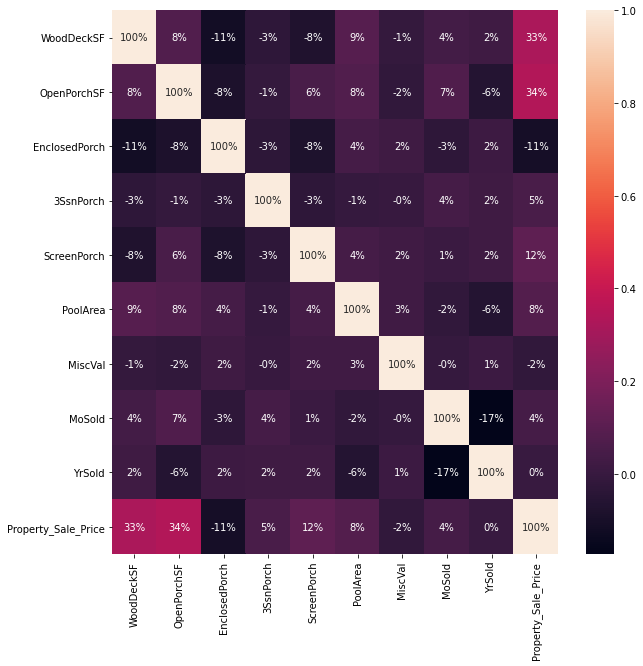

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,65:77].corr(), annot = True, fmt =".0%")

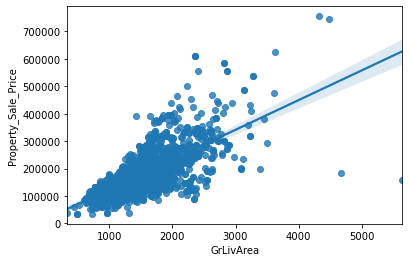

In [18]:
# GrLivArea as potential predictor
sns.regplot(x="GrLivArea", y="Property_Sale_Price", data=df)
# As the GrLivArea increases the target variable, price increases
plt.rcParams['figure.figsize']=(5,5)

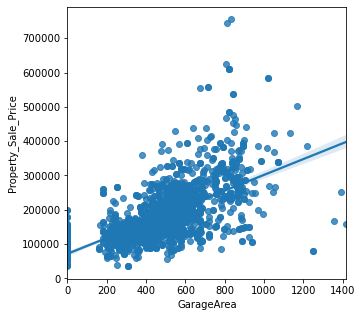

In [19]:
# GarageArea as potential predictor
sns.regplot(x="GarageArea", y="Property_Sale_Price", data=df)
plt.rcParams['figure.figsize']=(5,5)
# good predictor

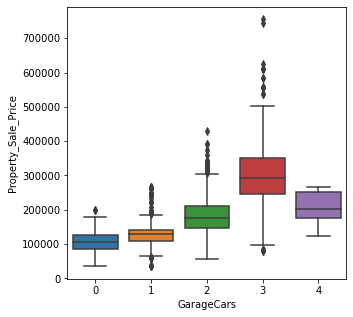

In [20]:
# GarageCars as potential predictor
sns.boxplot(x="GarageCars", y="Property_Sale_Price", data=df)
# GarageCars with 3 cars capacity has the highest price; the distribution of the predictor is distinct enough so it is a good
# predictor
plt.rcParams['figure.figsize']=(5,5)

<AxesSubplot:xlabel='OverallQual', ylabel='Property_Sale_Price'>

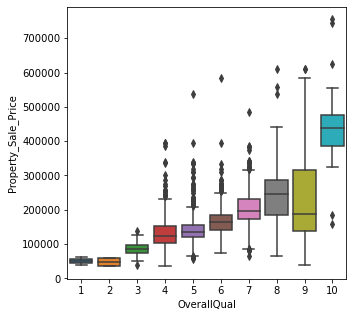

In [21]:
# OverallQual as potential predictor
sns.boxplot(x="OverallQual", y="Property_Sale_Price", data=df)
# OverallQual with 10 has the highest price; the distribution of the predictor is not distinct enough so it is not a
# good predictor

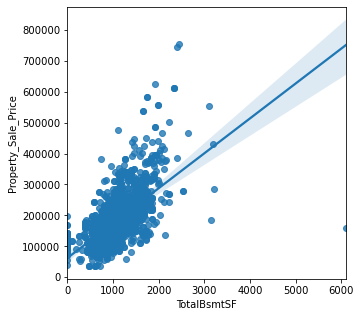

In [22]:
# TotalBsmtSF as potential predictor
sns.regplot(x="TotalBsmtSF", y="Property_Sale_Price", data=df)
# As the TotalBsmtSF increases the target variable, price increases
plt.rcParams['figure.figsize']=(10,10)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Property_Sale_Price'>

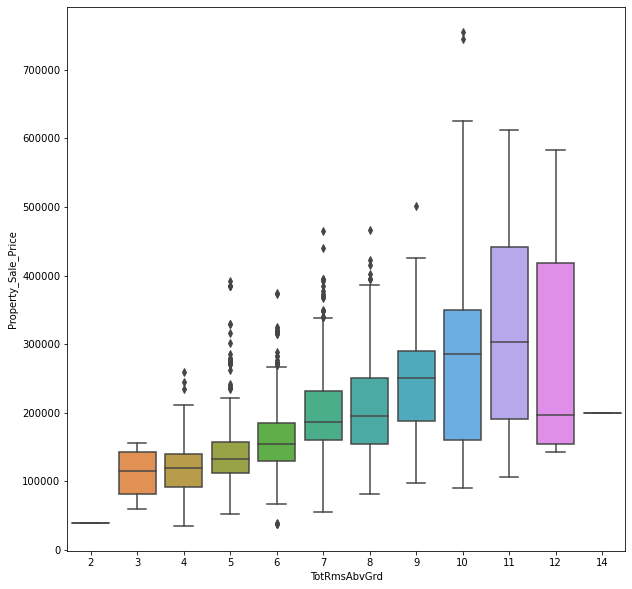

In [23]:
sns.boxplot(x="TotRmsAbvGrd", y="Property_Sale_Price", data=df)
# There is significant overlap so it is not a good predictor

<AxesSubplot:xlabel='FullBath', ylabel='Property_Sale_Price'>

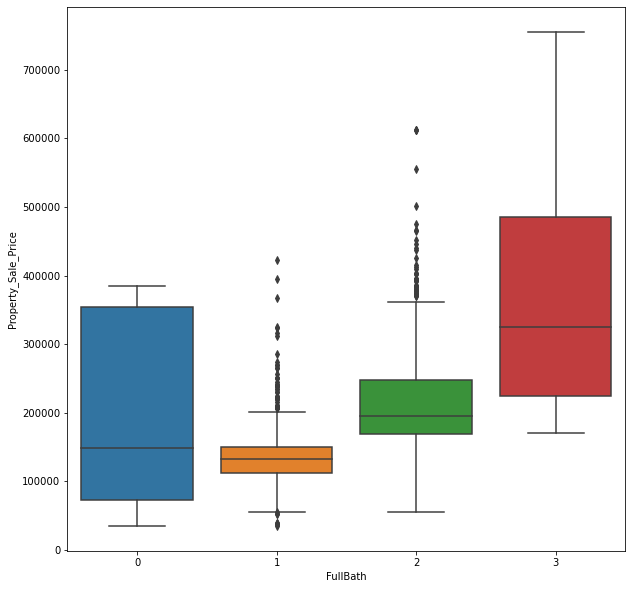

In [24]:
sns.boxplot(x="FullBath", y="Property_Sale_Price", data=df)
# The plot is distinct enough, so we'll consider it a good predictor

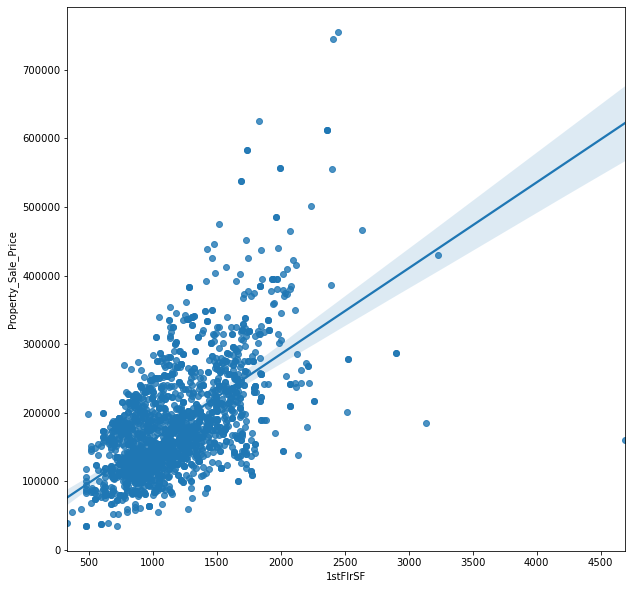

In [25]:
# 1stFlrSF as potential predictor
sns.regplot(x="1stFlrSF", y="Property_Sale_Price", data=df)
# As the 1stFlrSF increases the target variable, price increases
plt.rcParams['figure.figsize']=(5,5)

In [26]:
OverallCond_count = df["OverallCond"].value_counts().to_frame()
OverallCond_count.rename(columns={'OverallCond':'value-counts'},inplace=True)
OverallCond_count.index.name='OverallCond'
OverallCond_count

,value-counts
OverallCond,
5,943
6,351
7,315
8,172
4,147
9,113
3,26
2,5
1,1


<AxesSubplot:xlabel='OverallCond', ylabel='Property_Sale_Price'>

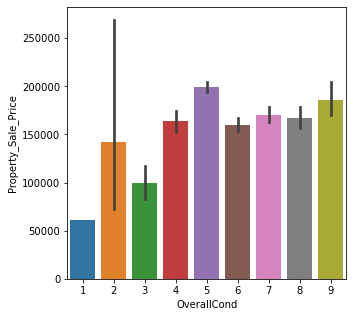

In [27]:
sns.barplot(x="OverallCond", y="Property_Sale_Price", data=df)

<AxesSubplot:xlabel='ScreenPorch', ylabel='Property_Sale_Price'>

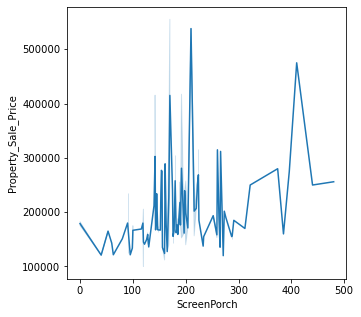

In [28]:
sns.lineplot(x = df['ScreenPorch'], y=df['Property_Sale_Price'], data=df)

In [29]:
df.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,25.735694,9215.982306,1.517115,1.360214,30.222647,20.432694,178.562890,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,72.056475,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,80.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,160.000000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
# The distribution of data is symmetric in LotFrontage as Mean = Median, for Dwell_Type the data is right skewed or 
# positively skewed as Mean > Median, for MoSold the data is left skewed i.e. negatively skewed as Median > Mean

In [31]:
print("Skewness: %f" % df['Property_Sale_Price'].skew())
# The value determines skewed distribution
print("Kurtosis: %f" % df['Property_Sale_Price'].kurt())
# As the value > 1, the distribution is too peaked

Skewness: 1.842123
Kurtosis: 6.262967


<AxesSubplot:xlabel='KitchenAbvGr', ylabel='Property_Sale_Price'>

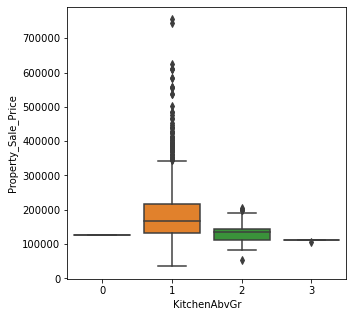

In [32]:
sns.boxplot(x="KitchenAbvGr", y="Property_Sale_Price", data=df)
# Considered a good predictor

In [33]:
df["KitchenAbvGr"].value_counts()

1    1965
2     101
3       5
0       2
Name: KitchenAbvGr, dtype: int64

In [34]:
df["OverallCond"] = df["OverallCond"].astype("object")

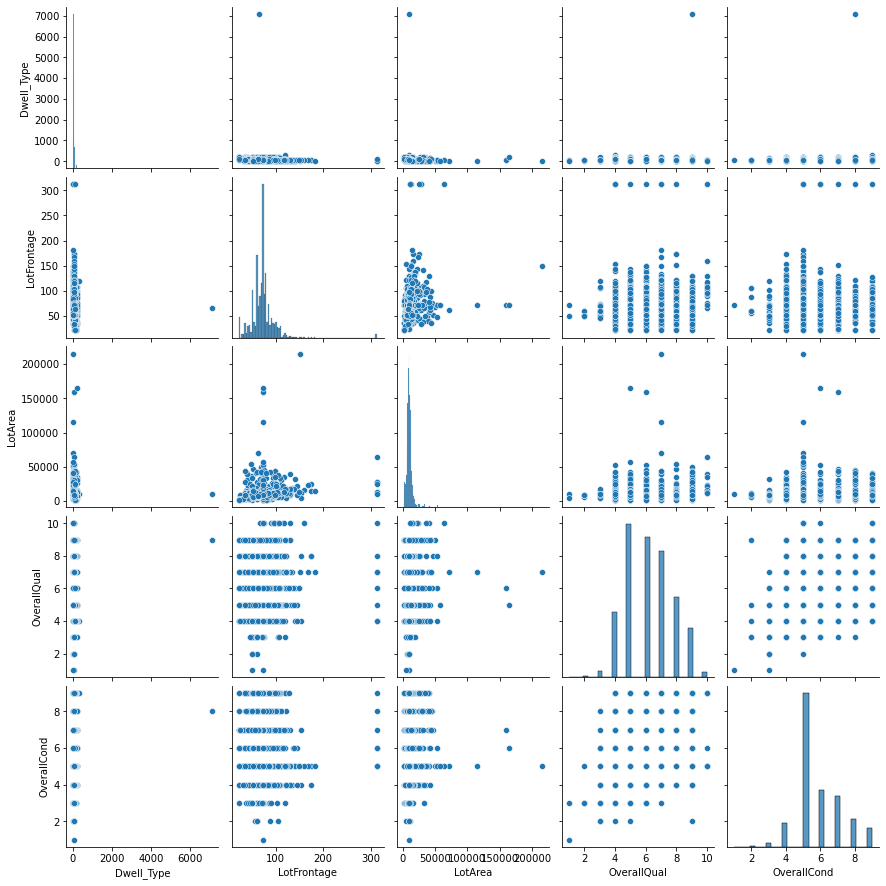

In [35]:
# Create a pairplot
sns.pairplot(df.iloc[:,1:18])

<AxesSubplot:xlabel='PoolArea', ylabel='Property_Sale_Price'>

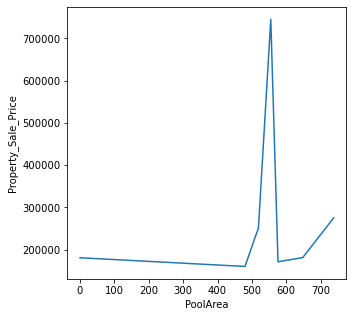

In [36]:
sns.lineplot(x = df['PoolArea'], y=df['Property_Sale_Price'], data=df)

In [37]:
group_one = df[["Zone_Class", "Property_Sale_Price"]]
group_one = group_one.groupby(["Zone_Class"], as_index=False).mean()
group_one
# from the below data, the FV zone class, on average are the most expensive & C is the least expensive

,Zone_Class,Property_Sale_Price
0,C (all),70135.857143
1,FV,215926.049020
2,RH,134719.727273
3,RL,190561.576040
4,RM,130186.074074


In [38]:
df["Road_Type"].value_counts()

Pave    2063
Grvl      10
Name: Road_Type, dtype: int64

<AxesSubplot:xlabel='Road_Type', ylabel='Property_Sale_Price'>

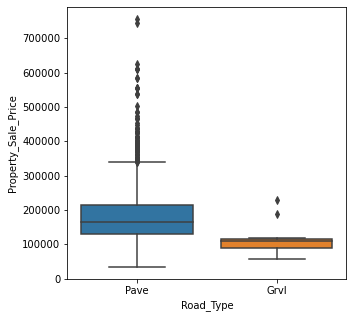

In [39]:
sns.boxplot(x="Road_Type", y="Property_Sale_Price", data=df)
# The data is skewed that's why this is not a good predictor

Y    1935
N     138
Name: CentralAir, dtype: int64

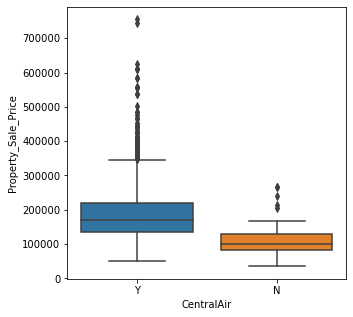

In [40]:
sns.boxplot(x="CentralAir", y="Property_Sale_Price", data=df)
# CentralAir is not a good predictor (skewed)
df["CentralAir"].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


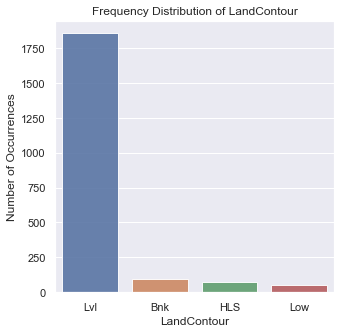

In [41]:
count = df['LandContour'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of LandContour')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('LandContour', fontsize=12)
plt.show()
# Near Flat/Level has the highest number of occurences

<AxesSubplot:xlabel='LandContour', ylabel='Property_Sale_Price'>

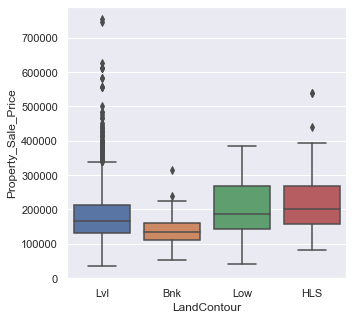

In [42]:
sns.boxplot(x="LandContour", y="Property_Sale_Price", data=df)
# LandContour is a good predictor

<AxesSubplot:xlabel='Utilities', ylabel='Property_Sale_Price'>

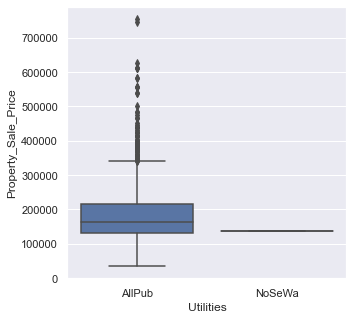

In [43]:
sns.boxplot(x="Utilities", y="Property_Sale_Price", data=df)

In [44]:
df["Utilities"].value_counts()
# The data is skewed that's why this is not a good predictor

AllPub    2070
NoSeWa       3
Name: Utilities, dtype: int64

In [45]:
group_two = df[["Zone_Class", "LotConfig", "Property_Sale_Price"]]
group_two = group_two.groupby(["Zone_Class","LotConfig"], as_index=False).mean()
group_two

,Zone_Class,LotConfig,Property_Sale_Price
0,C (all),Corner,101300.000000
1,C (all),Inside,61636.545455
2,FV,Corner,194892.857143
3,FV,CulDSac,328900.000000
4,FV,FR2,158966.666667
5,FV,FR3,183900.000000
6,FV,Inside,221524.772152
7,RH,Corner,105266.666667
8,RH,Inside,139370.210526
9,RL,Corner,193450.046823


In [46]:
grouped_pivot = group_two.pivot(index="Zone_Class", columns="LotConfig")
grouped_pivot

Property_Sale_Price                                          \
LotConfig               Corner        CulDSac            FR2       FR3   
Zone_Class                                                               
C (all)          101300.000000            NaN            NaN       NaN   
FV               194892.857143  328900.000000  158966.666667  183900.0   
RH               105266.666667            NaN            NaN       NaN   
RL               193450.046823  214506.895522  188702.142857  315000.0   
RM               134600.865672  240000.000000  167511.700000  167500.0   

                           
LotConfig          Inside  
Zone_Class                 
C (all)      61636.545455  
FV          221524.772152  
RH          139370.210526  
RL          186921.813830  
RM          126688.168033

In [47]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

Property_Sale_Price                                          \
LotConfig               Corner        CulDSac            FR2       FR3   
Zone_Class                                                               
C (all)          101300.000000       0.000000       0.000000       0.0   
FV               194892.857143  328900.000000  158966.666667  183900.0   
RH               105266.666667       0.000000       0.000000       0.0   
RL               193450.046823  214506.895522  188702.142857  315000.0   
RM               134600.865672  240000.000000  167511.700000  167500.0   

                           
LotConfig          Inside  
Zone_Class                 
C (all)      61636.545455  
FV          221524.772152  
RH          139370.210526  
RL          186921.813830  
RM          126688.168033

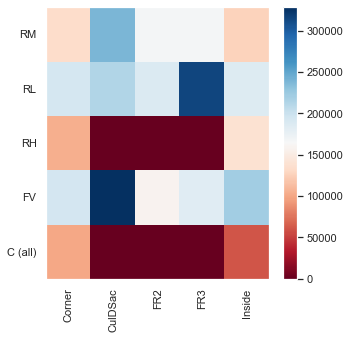

In [48]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap="RdBu")

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#From the figure below; FR3, RL & CulDSac, FV has the highest price

In [49]:
group_three = df[["Neighborhood", "HouseStyle","Property_Sale_Price"]]
group_three = group_three.groupby(["Neighborhood","HouseStyle"], as_index=False).mean()
grouped_pivot1 = group_three.pivot(index="Neighborhood", columns="HouseStyle")
grouped_pivot1 = grouped_pivot1.fillna(0)
grouped_pivot1

Property_Sale_Price                                               \
HouseStyle                1.5Fin         1.5Unf         1Story         2.5Fin   
Neighborhood                                                                    
Blmngtn                 0.000000       0.000000  190835.666667       0.000000   
Blueste                 0.000000       0.000000       0.000000       0.000000   
BrDale                  0.000000       0.000000       0.000000       0.000000   
BrkSide            144812.903226  118750.000000   88933.333333       0.000000   
ClearCr            206405.333333       0.000000  223681.818182       0.000000   
CollgCr            193879.000000  383970.000000  188538.353846       0.000000   
Crawfor            215953.571429   96500.000000  223517.555556  191000.000000   
Edwards            119037.037037       0.000000  125547.500000       0.000000   
Gilbert            175250.000000       0.000000  201538.105263       0.000000   
IDOTRR             114825.052632  121933.333333   88395.952381       0.000000   
MeadowV                 0.000000       0.000000  131266.666667       0.000000   
Mitchel            185971.555556       0.000000  148320.000000       0.000000   
NAmes              132114.285714  120250.000000  140851.556075       0.000000   
NPkVill                 0.000000       0.000000  137972.222222       0.000000   
NWAmes             229000.000000       0.000000  182390.576923       0.000000   
NoRidge            347500.000000       0.000000  332971.428571       0.000000   
NridgHt                 0.000000       0.000000  316639.451613       0.000000   
OldTown            117452.272727   95100.000000  105277.148936  291333.333333   
SWISU              139688.933333       0.000000   75500.000000  168416.666667   
Sawyer             135222.222222       0.000000  137051.106667       0.000000   
SawyerW            251200.000000   76000.000000  166000.042553       0.000000   
Somerst                 0.000000       0.000000  243373.103448       0.000000   
StoneBr                 0.000000       0.000000  269051.956522       0.000000   
Timber             201316.666667       0.000000  253663.900000       0.000000   
Veenker                 0.000000       0.000000  281375.000000       0.000000   

                                                                          
HouseStyle           2.5Unf         2Story         SFoyer           SLvl  
Neighborhood                                                              
Blmngtn            0.000000       0.000000       0.000000       0.000000  
Blueste            0.000000  133000.000000       0.000000       0.000000  
BrDale             0.000000  105288.235294       0.000000       0.000000  
BrkSide       214500.000000  160547.916667       0.000000       0.000000  
ClearCr            0.000000  230169.230769       0.000000  155000.000000  
CollgCr            0.000000  225517.972603  135800.000000  161633.333333  
Crawfor       164000.000000  205206.678571       0.000000       0.000000  
Edwards            0.000000  146634.375000  141583.333333  167104.444444  
Gilbert            0.000000  191615.137931       0.000000  172271.818182  
IDOTRR        101000.000000   80385.166667       0.000000  109900.000000  
MeadowV            0.000000   96408.333333   83875.000000   91000.000000  
Mitchel            0.000000  171600.000000  156114.285714  158857.142857  
NAmes         128950.000000  166800.000000  149895.000000  160416.666667  
NPkVill            0.000000  151250.000000       0.000000       0.000000  
NWAmes        205000.000000  205262.195122  176450.000000  179175.000000  
NoRidge            0.000000  318068.464286       0.000000       0.000000  
NridgHt            0.000000  333362.108108       0.000000       0.000000  
OldTown       152390.909091  129875.170213  142000.000000       0.000000  
SWISU              0.000000  149737.500000       0.000000       0.000000  
Sawyer             0.000000  178086.555556  137862.111111  158416.666667  
SawyerW            

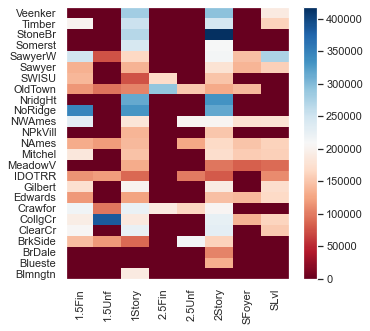

In [50]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot1, cmap="RdBu")

#label names
row_labels = grouped_pivot1.columns.levels[1]
col_labels = grouped_pivot1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [51]:
# Pearson Correlation
from scipy import stats

In [52]:
pearson_coef, p_value = stats.pearsonr(df["GrLivArea"], df["Property_Sale_Price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
# Since the p-value is  <  0.001, the correlation between GrLivArea and price is statistically significant, and the 
# linear relationship is quite strong

The Pearson Correlation Coefficient is 0.7109379883619803  with a P-value of P = 5.78166e-319


In [53]:
pearson_coef, p_value = stats.pearsonr(df["GarageCars"], df["Property_Sale_Price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
# Since the p-value is  <  0.001, the correlation between GarageCars and price is statistically significant, and the 
# linear relationship is moderately strong

The Pearson Correlation Coefficient is 0.6339513267913902  with a P-value of P = 1.9724233361648837e-233


In [54]:
pearson_coef, p_value = stats.pearsonr(df["GarageArea"], df["Property_Sale_Price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
# Since the p-value is  <  0.001, the correlation between GarageArea and price is statistically significant, and the 
# linear relationship is moderately strong

The Pearson Correlation Coefficient is 0.6210489459391499  with a P-value of P = 2.075150264594714e-221


In [55]:
pearson_coef, p_value = stats.pearsonr(df["TotalBsmtSF"], df["Property_Sale_Price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6188277580545808  with a P-value of P = 2.1390840069517737e-219


In [56]:
pearson_coef, p_value = stats.pearsonr(df["1stFlrSF"], df["Property_Sale_Price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6001249993957659  with a P-value of P = 4.5616657279240316e-203


In [57]:
# Since the p-value is  <  0.001, the correlation between 1stFlrSF, price & TotalBsmtSF, price is statistically 
# significant, and the linear relationship is moderately strong

In [58]:
# Important Variables
# GrLivArea
# GarageCars
# GarageArea
# TotalBsmtSF
# 1stFlrSF
# FullBath
# KitchenAbvGr
# LandContour

In [92]:
X = np.array(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[5.055543796538803, 1.2345030008829434, 28.853934281308852, 12.435079392047989, 3.2254656592079747, 256.8366257262625, 3.5689869056905525, 20.996235032199937, 1.2018726334361607, 4.972266420075211, 1.6016624751014756, 6.593394941349054, 7.214340489919679, 77.45457151700948, 1.9499465418155915, 6.453613707998193, 27.963178828761663, 17.984651632508307, 13198.511203031734, 24041.51277979725, 4.802588252274401, 5.009287515035797, 39.285974186683625, 36.54498743774008, 13.665963768048659, 2.6245027021233494, 38.00471572017443, 32.997905391277854, 9.344487381418455, 17.81902477190598, 22.51444241689737, 7.1776139576019675, 6.393862021566083, inf, 61.368190108924225, inf, inf, inf, 15.732062288531385, 2.995474290571007, 24.752799839298035, 18.60596979917932, inf, inf, inf, inf, 3.8266888062338125, 1.3256596418768392, 27.98682663942903, 3.637784124811868, 36.301221312334754, 35.47687612186459, 19.47228455529867, 89.02347228636606, 47.17888945260188, 3.6118119580175456, 11.840729377533938, 4.3

In [93]:
from sklearn.preprocessing import LabelEncoder
cols = ('Zone_Class','FireplaceQu','Road_Type','Property_Shape','LandContour','Utilities','LotConfig','LandSlope',
        'Neighborhood','Condition1','Condition2','Dwelling_Type','HouseStyle','OverallCond','RoofStyle','RoofMatl',
        'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
        'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
        'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'
       )

# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [94]:
df.shape

(2073, 77)

In [95]:
y_data = df.iloc[:,76:]

In [96]:
x_data = df.iloc[:,:76]

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=45)

In [99]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1658, 76) (415, 76)
(1658, 1) (415, 1)


In [100]:
# Feature Selection
# RFE 

In [101]:
from sklearn.linear_model import LinearRegression
reg4 = LinearRegression()

In [102]:
from sklearn.feature_selection import RFE
rfe = RFE(reg4,76)
X_train_rfe = rfe.fit_transform(x_train,y_train)
X_test_rfe = rfe.transform(x_test)
reg4.fit(X_train_rfe,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=76 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LinearRegression()

In [103]:
print('The r-squared value is: ', reg4.score(X_train_rfe,y_train))

The r-squared value is:  0.8436407214858938


In [104]:
y_pred = reg4.predict(X_test_rfe)

In [105]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  869711737.3266702


In [106]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [107]:
# Univariate

In [108]:
from sklearn.feature_selection import SelectKBest, chi2
X_best= SelectKBest(chi2, k=12).fit(x_train, y_train)
mask = X_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, x_train.columns):
    if bool:
        new_feat.append(feature)
print(new_feat)

['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', '3SsnPorch', 'PoolArea', 'MiscVal']


#### MODEL 1

In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [110]:
reg.coef_

array([[-3.42937080e+00, -5.03602367e+00, -1.55380856e+03,
        -7.24034082e+01,  1.47641830e-01,  2.87823434e+04,
        -1.55805127e+03,  3.37077804e+03, -4.10965645e+04,
         7.42041245e+02,  6.33372989e+03,  5.36911024e+02,
        -7.36422131e+02, -7.36305490e+03, -4.05409249e+03,
        -5.82484962e+02,  2.25417196e+03,  3.08886703e+03,
         2.02126145e+01,  7.06641045e+01,  2.03504481e+03,
         5.28663139e+03, -1.10019204e+03,  7.23214211e+02,
         5.35697954e+03,  5.57513697e+01, -1.36984638e+04,
         6.52857009e+02,  1.12705227e+03, -9.10953403e+03,
         2.34414363e+03, -3.63124122e+03, -3.69378640e+02,
         6.38133466e+00,  1.72090392e+03,  7.89994213e+00,
        -6.38036059e-02,  1.42174732e+01, -2.86484007e+03,
        -1.11421046e+03,  6.60478496e+03,  6.32473921e+02,
         2.23259202e+01,  1.81219398e+01, -2.14228221e+01,
         1.90250380e+01,  8.30874201e+03, -7.83432681e+02,
         8.86529217e+03,  4.71998578e+03, -2.87831914e+0

In [111]:
reg.intercept_

array([1055546.37499239])

In [112]:
print('The r-squared value is: ', reg.score(x_train,y_train))

The r-squared value is:  0.8436407214858938


array([[<AxesSubplot:title={'center':'Property_Sale_Price'}>]],
      dtype=object)

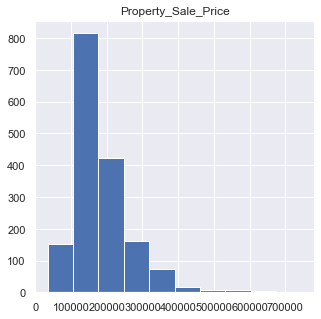

In [113]:
y_train.hist()

array([[<AxesSubplot:title={'center':'Property_Sale_Price'}>]],
      dtype=object)

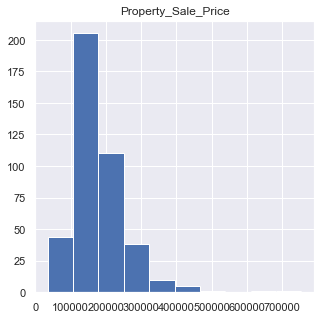

In [114]:
y_test.hist()

In [115]:
y_pred = reg.predict(x_test)

In [116]:
y_pred[:10]

array([[162346.76281498],
       [ 89468.34855387],
       [319553.37580474],
       [156491.05475339],
       [206151.88987707],
       [206942.11525226],
       [121540.06267953],
       [ 84127.63899829],
       [137494.96553005],
       [133898.07156776]])

In [117]:
from sklearn.metrics import mean_squared_error

In [118]:
mse = mean_squared_error(y_test, y_pred)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  869711737.3266702


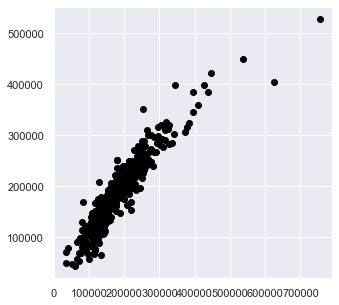

In [119]:
plt.scatter(y_test, y_pred,  color='black')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


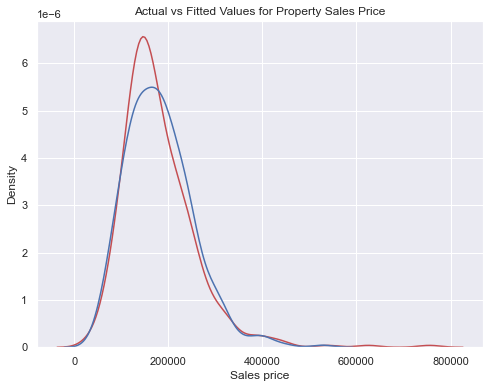

In [120]:
width = 8
height = 6
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Property Sales Price')
plt.xlabel("Sales price")
plt.show()
plt.close()

#### MODEL 2

In [121]:
from sklearn.tree import DecisionTreeRegressor
reg2 = DecisionTreeRegressor().fit(x_train, y_train)

In [122]:
print('The r-squared value is: ', reg2.score(x_train,y_train))

The r-squared value is:  1.0


In [123]:
y_pred2 = reg2.predict(x_test)

In [128]:
y_pred2

array([145000., 111000., 381000., 160000., 150000., 286000., 143750.,
       129000., 138500., 128200., 186500.,  85000., 217500., 275000.,
       115000., 437154., 440000., 194700., 217500., 310000., 383970.,
       149500., 222000., 174000.,  91500., 239000., 130000., 183500.,
       155000., 110000., 197000., 282922., 214500., 226000., 217500.,
       146800.,  86000., 187500., 229456., 144152., 179540., 230000.,
        75000., 154500., 228500., 118500., 148000., 319000., 118500.,
       139400., 202665., 110500., 320000., 174000., 250000., 159000.,
        91000., 154300., 437154., 138500., 103000., 145000., 174000.,
       105000., 149500., 284000., 127000., 245350., 167500., 110000.,
       319900., 136905., 187500., 113000., 153000., 127500., 177000.,
       100000., 284000., 319000., 145000., 123000.,  85000., 207500.,
       167000., 135000., 328000., 319900., 255900., 112000., 135000.,
       236500., 159895., 168500., 143000., 144000., 114500., 154000.,
       160000., 2120

In [129]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  1183203276.240964


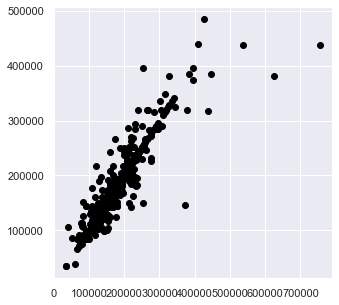

In [130]:
plt.scatter(y_test, y_pred2,  color='black')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


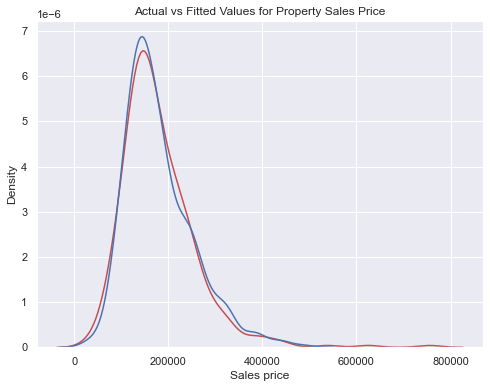

In [131]:
width = 8
height = 6
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Property Sales Price')
plt.xlabel("Sales price")
plt.show()
plt.close()

In [132]:
# Model 2 has better r-squared value, and it is clear from the dist plot that this model is better as the fitted line 
# almost same as the actual line